In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

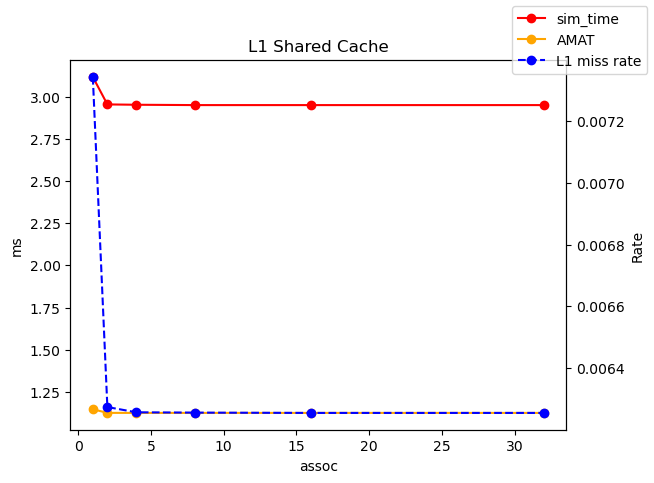

In [13]:
# L1_shared_cache

file_list = ["./L1_share/stats_assoc_1.txt","./L1_share/stats_assoc_2.txt","./L1_share/stats_assoc_4.txt",
            "./L1_share/stats_assoc_8.txt","./L1_share/stats_assoc_16.txt","./L1_share/stats_assoc_32.txt"]

L1_share_item = ["simSeconds", 
        "system.l1cache.demandMissRate::total"]
result = []
L1_share_records = {"assoc": 0, "sim_time":0, "l1_total_miss_rate":0, "AMAT":0}

for idx, file in enumerate(file_list):
    f = open(file, 'r')
    L1_share_records["assoc"] = 2**(idx)
    for line in f:
        str = line.split()
        if len(str)!=0 and str[0] in L1_share_item:
            if str[0] == L1_share_item[0]:
                L1_share_records["sim_time"] = float(str[1])*1e3
            elif str[0] == L1_share_item[1]:
                L1_share_records["l1_total_miss_rate"] = float(str[1])
    
    L1_share_records["AMAT"] = 1 + L1_share_records["l1_total_miss_rate"] * 20

    result.append(L1_share_records)

    L1_share_records = {"assoc": 0, "sim_time":0, "l1_total_miss_rate":0, "AMAT":0}
    
L1_share_df = pd.DataFrame(result)

fig, ax1 = plt.subplots()

plt.title("L1 Shared Cache")

ax1.plot(L1_share_df["assoc"], L1_share_df["sim_time"], 'o', ls='-',color="red", label='sim_time')
ax1.plot(L1_share_df["assoc"], L1_share_df["AMAT"], 'o', ls='-',color="orange", label='AMAT')
ax1.set_ylabel('ms')
ax1.set_xlabel('assoc')
    
ax2 = ax1.twinx()
ax2.plot(L1_share_df["assoc"], L1_share_df["l1_total_miss_rate"], 'o', ls='--',color="blue", label='L1 miss rate')
ax2.set_ylabel('Rate',color="black")
ax2.tick_params(axis='y', labelcolor='black')
    
fig.legend(loc="upper right")

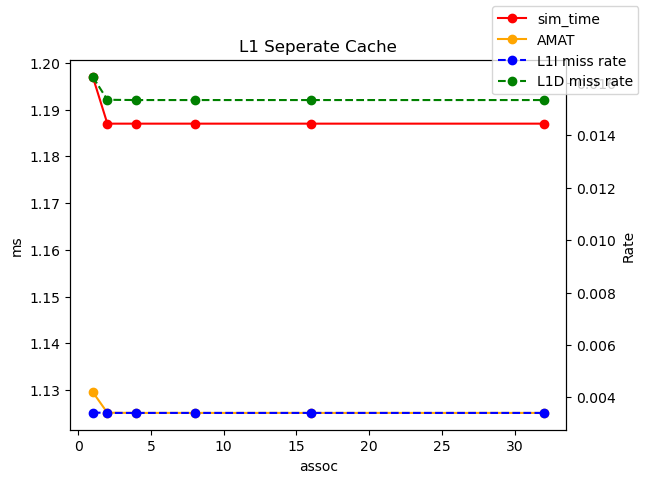

In [14]:
# L1_spereate_cache

file_list = ["./L1_separate/stats_assoc_1.txt","./L1_separate/stats_assoc_2.txt","./L1_separate/stats_assoc_4.txt",
            "./L1_separate/stats_assoc_8.txt","./L1_separate/stats_assoc_16.txt","./L1_separate/stats_assoc_32.txt"]

L1_spereate_item = ["simSeconds", 
        "system.cpu.icache.demandMissRate::total", 
        "system.cpu.dcache.demandMissRate::total",
        "system.cpu.icache.demandHits::total",
        "system.cpu.dcache.demandHits::total",
        "system.cpu.icache.demandMisses::total",
        "system.cpu.dcache.demandMisses::total"]

L1_spereate_records = {"assoc": 0, "sim_time":0, "l1i_miss_rate":0, "l1d_miss_rate":0, "AMAT":0}
result = []

for idx, file in enumerate(file_list):
    f = open(file, 'r')
    L1_spereate_records["assoc"] = 2**idx
    miss = 0
    hits = 0
    for line in f:
        str = line.split()
        if len(str)!=0 and str[0] in L1_spereate_item:
            if str[0] == L1_spereate_item[0]:
                L1_spereate_records["sim_time"] = float(str[1])*1e3
            elif str[0] == L1_spereate_item[1]:
                L1_spereate_records["l1i_miss_rate"] = float(str[1])
            elif str[0] == L1_spereate_item[2]:
                L1_spereate_records["l1d_miss_rate"] = float(str[1])
            elif str[0] == L1_spereate_item[3] or str[0] == L1_spereate_item[4]:
                hits += float(str[1])
            elif str[0] == L1_spereate_item[5] or str[0] == L1_spereate_item[6]:
                miss += float(str[1])
    
    L1_spereate_records["AMAT"] = 1 + (miss/(miss+hits)) * 20
    
    # L1_share_records["l1_total_miss_rate"] = L1_share_records["l1d_miss_rate"] + L1_share_records["l1i_miss_rate"]

    result.append(L1_spereate_records)
    L1_spereate_records = {"assoc": 0, "sim_time":0, "l1i_miss_rate":0, "l1d_miss_rate":0, "AMAT":0}

L1_seperate_df = pd.DataFrame(result)

fig, ax1 = plt.subplots()
plt.title("L1 Seperate Cache")

ax1.plot(L1_seperate_df["assoc"], L1_seperate_df["sim_time"], 'o', ls='-',color="red", label='sim_time')
ax1.plot(L1_seperate_df["assoc"], L1_seperate_df["AMAT"], 'o', ls='-',color="orange", label='AMAT')
ax1.set_ylabel('ms')
ax1.set_xlabel('assoc')
    
ax2 = ax1.twinx()
ax2.plot(L1_seperate_df["assoc"], L1_seperate_df["l1i_miss_rate"], 'o', ls='--',color="blue", label='L1I miss rate')
ax2.plot(L1_seperate_df["assoc"], L1_seperate_df["l1d_miss_rate"], 'o', ls='--',color="green", label='L1D miss rate')
ax2.set_ylabel('Rate',color="black")
ax2.tick_params(axis='y', labelcolor='black')
    
fig.legend(loc="upper right")

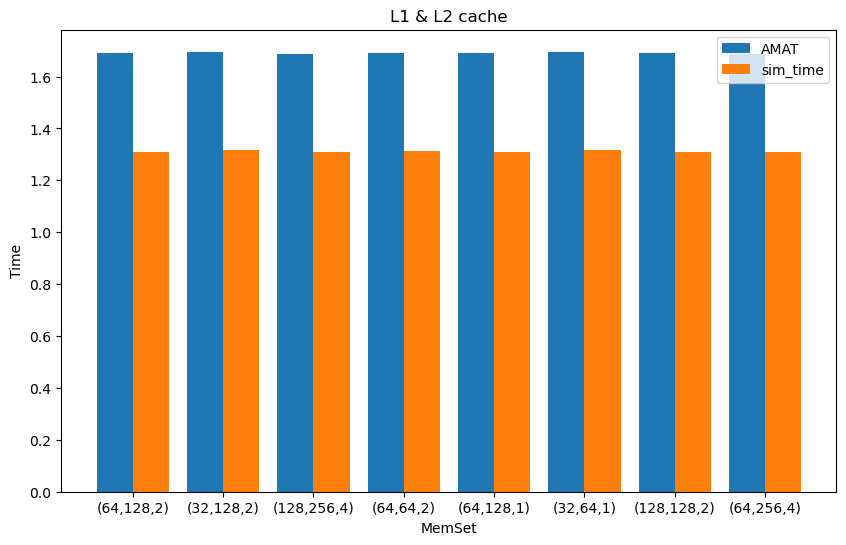

In [15]:
# L1 + L2 cache

# file_list = ["./L2/stats(64,128,2).txt"]

setting = ["(64,128,2)","(32,128,2)","(128,256,4)",
            "(64,64,2)","(64,128,1)","(32,64,1)",
            "(128,128,2)", "(64,256,4)"]

file_list = ["./L2/stats(64,128,2).txt","./L2/stats(32,128,2).txt","./L2/stats(128,256,4).txt",
            "./L2/stats(64,64,2).txt","./L2/stats(64,128,1).txt","./L2/stats(32,64,1).txt",
            "./L2/stats(128,128,2).txt", "./L2/stats(64,256,4).txt"]

L2_item = ["simSeconds", 
        "system.cpu.icache.demandMissRate::total", 
        "system.cpu.dcache.demandMissRate::total",
        "system.cpu.icache.demandHits::total",
        "system.cpu.dcache.demandHits::total",
        "system.cpu.icache.demandMisses::total",
        "system.cpu.dcache.demandMisses::total",
        "system.l2cache.demandMissRate::total"]

L2_records = {"MemSet":None, "sim_time":0, "l1i_miss_rate":0, "l1d_miss_rate":0, "l2_miss_rate":0, "AMAT":0}

result = []

for idx, file in enumerate(file_list):
    f = open(file, 'r')
    L2_records["MemSet"] = setting[idx]
    miss = 0
    hits = 0
    for line in f:
        str = line.split()
        if len(str)!=0 and str[0] in L2_item:
            if str[0] == L1_spereate_item[0]:
                L2_records["sim_time"] = float(str[1])*1e3
            elif str[0] == L2_item[1]:
                L2_records["l1i_miss_rate"] = float(str[1])
            elif str[0] == L2_item[2]:
                L2_records["l1d_miss_rate"] = float(str[1])
            elif str[0] == L2_item[3] or str[0] == L2_item[4]:
                hits += float(str[1])
            elif str[0] == L2_item[5] or str[0] == L2_item[6]:
                miss += float(str[1])
            elif str[0] == L2_item[7]:
                L2_records["l2_miss_rate"] = float(str[1])
                
    L2_records["AMAT"] = 1 + (miss/(miss+hits)) * (10 + L2_records["l2_miss_rate"] * 100)
    
    # L1_share_records["l1_total_miss_rate"] = L1_share_records["l1d_miss_rate"] + L1_share_records["l1i_miss_rate"]

    result.append(L2_records)

    L2_records = {"MemSet":None, "sim_time":0, "l1i_miss_rate":0, "l1d_miss_rate":0, "l2_miss_rate":0, "AMAT":0}


L2_df = pd.DataFrame(result)

fig, ax1 = plt.subplots()

X_axis = np.arange(8) 

plt.title("L1 & L2 cache")
    
x = np.array(L2_df["MemSet"])
y = np.array(L2_df["AMAT"])
z = np.array(L2_df["sim_time"])


ax1.bar(X_axis - 0.2, y, 0.4, label = 'AMAT') 
ax1.bar(X_axis + 0.2, z, 0.4, label = 'sim_time') 
plt.xticks(X_axis, x)

# ax1.bar(x, y)
ax1.set_ylabel('Time')
ax1.set_xlabel("MemSet")

plt.legend() 
    
fig.set_size_inches(10,6, forward=True)

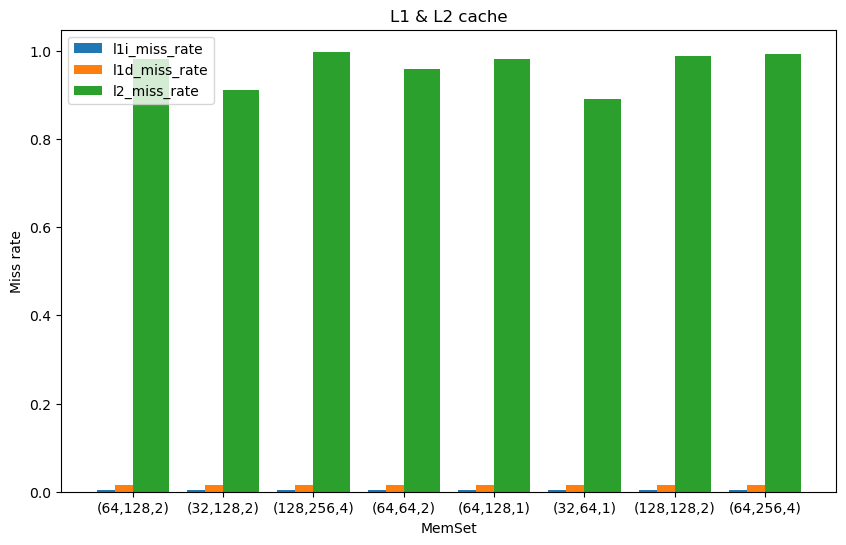

In [16]:
fig, ax1 = plt.subplots()

X_axis = np.arange(8) 

plt.title("L1 & L2 cache")
    
x = np.array(L2_df["MemSet"])
y = np.array(L2_df["l1i_miss_rate"])
z = np.array(L2_df["l1d_miss_rate"])
h = np.array(L2_df["l2_miss_rate"])


ax1.bar(X_axis - 0.2, y, 0.4, label = 'l1i_miss_rate') 
ax1.bar(X_axis, z, 0.4, label = 'l1d_miss_rate')
ax1.bar(X_axis + 0.2, h, 0.4, label = 'l2_miss_rate') 
plt.xticks(X_axis, x)

# ax1.bar(x, y)
ax1.set_ylabel('Miss rate')
ax1.set_xlabel("MemSet")

plt.legend() 
    
fig.set_size_inches(10,6, forward=True)

In [17]:
L1_share_df

,assoc,sim_time,l1_total_miss_rate,AMAT
0,1,3.117,0.007343,1.14686
1,2,2.954,0.006274,1.12548
2,4,2.952,0.006257,1.12514
3,8,2.950,0.006256,1.12512
4,16,2.950,0.006255,1.12510
5,32,2.950,0.006255,1.12510


In [18]:
L1_seperate_df

,assoc,sim_time,l1i_miss_rate,l1d_miss_rate,AMAT
0,1,1.197,0.003420,0.016233,1.129538
1,2,1.187,0.003405,0.015360,1.125145
2,4,1.187,0.003405,0.015350,1.125099
3,8,1.187,0.003405,0.015350,1.125099
4,16,1.187,0.003405,0.015350,1.125099
5,32,1.187,0.003405,0.015350,1.125099


In [19]:
L2_df

,MemSet,sim_time,l1i_miss_rate,l1d_miss_rate,l2_miss_rate,AMAT
0,"(64,128,2)",1.309,0.003466,0.015641,0.981786,1.689212
1,"(32,128,2)",1.315,0.004116,0.015641,0.911019,1.694179
2,"(128,256,4)",1.308,0.003418,0.015360,0.998003,1.688172
3,"(64,64,2)",1.312,0.003466,0.016261,0.959344,1.690587
4,"(64,128,1)",1.309,0.003466,0.015641,0.981786,1.689212
5,"(32,64,1)",1.317,0.004116,0.016261,0.891664,1.695561
6,"(128,128,2)",1.309,0.003418,0.015641,0.987428,1.688846
7,"(64,256,4)",1.309,0.003466,0.015360,0.992240,1.688538
